## Lung Pneumonia And Malaria Disease Classifier using Transfer Learning (VGG, Resnet and Inception)

Data taken from Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as rpp
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

In [50]:
IMAGE_SIZE = [224, 224]

#train_path = '/Users/akshayadlakha/Downloads/Dataset/Train'
#test_path = '/Users/akshayadlakha/Downloads/Dataset/Test'

train_path = '/Users/akshayadlakha/Downloads/chest_xray/train'
test_path = '/Users/akshayadlakha/Downloads/chest_xray/test'
val_path = '/Users/akshayadlakha/Downloads/chest_xray/val'

## VGG

In [4]:
base_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
from glob import glob

#folders = glob('/Users/akshayadlakha/Downloads/Dataset/Train/*')

folders = glob('/Users/akshayadlakha/Downloads/chest_xray/train/*')
folders

['/Users/akshayadlakha/Downloads/chest_xray/train/PNEUMONIA',
 '/Users/akshayadlakha/Downloads/chest_xray/train/NORMAL']

In [7]:
base_model

In [8]:
x = Flatten()(base_model.output)

In [9]:
model = Model(inputs=base_model.input, outputs=Dense(len(folders), activation='softmax')(x))

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# training_set = train_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')


training_set = train_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [15]:
# test_set = test_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/Dataset/Test',
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [16]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
163/163 [==============================] - 1043s 6s/step - loss: 0.2341 - accuracy: 0.9112 - val_loss: 0.3280 - val_accuracy: 0.8878
Epoch 2/10
163/163 [==============================] - 1133s 7s/step - loss: 0.1163 - accuracy: 0.9530 - val_loss: 0.2427 - val_accuracy: 0.9215
Epoch 3/10
163/163 [==============================] - 1135s 7s/step - loss: 0.2483 - accuracy: 0.9271 - val_loss: 0.3411 - val_accuracy: 0.9038
Epoch 4/10
163/163 [==============================] - 1153s 7s/step - loss: 0.1014 - accuracy: 0.9630 - val_loss: 0.3255 - val_accuracy: 0.9038
Epoch 5/10
163/163 [==============================] - 1263s 8s/step - loss: 0.1178 - accuracy: 0.9561 - val_loss: 0.3668 - val_accuracy: 0.8702
Epoch 6/10
163/163 [==============================] - 1242s 8s/step - loss: 0.0896 - accuracy: 0.9674 - val_loss: 0.2773 - val_accuracy: 0.9167
Epoch 7/10
163/163 [==============================] - 1182s 7s/step - loss: 0.0927 - accuracy: 0.9645 - val_loss: 0.3568 - val_accuracy:

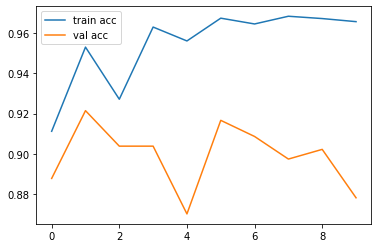

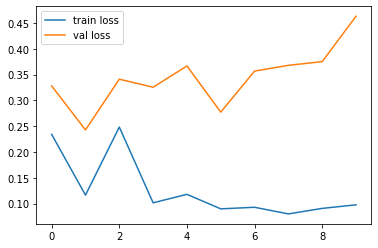

In [17]:
# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[5.3277836e-07, 9.9999952e-01],
       [9.5854523e-03, 9.9041450e-01],
       [2.2138156e-08, 1.0000000e+00],
       ...,
       [3.4110748e-05, 9.9996591e-01],
       [6.3759908e-05, 9.9993622e-01],
       [4.3748308e-04, 9.9956256e-01]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
# img=image.load_img('/Users/akshayadlakha/Downloads/Dataset/Test/Uninfected/2.png',target_size=(224,224))

img=image.load_img('/Users/akshayadlakha/Downloads/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg',target_size=(224,224))


In [27]:
imgx=image.img_to_array(img)
imgx

array([[[  8.,   8.,   8.],
        [ 16.,  16.,  16.],
        [252., 252., 252.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  8.,   8.,   8.],
        [ 16.,  16.,  16.],
        [252., 252., 252.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  8.,   8.,   8.],
        [ 16.,  16.,  16.],
        [252., 252., 252.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [ 14.,  14.,  14.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [ 14.,  14.,  14.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [ 14.,  

In [28]:
#imgx=imgx/255
imgx=np.expand_dims(imgx,axis=0)
img_data=preprocess_input(imgx)
img_data.shape

(1, 224, 224, 3)

In [29]:
result = model.predict(img_data)

In [30]:
result

array([[0., 1.]], dtype=float32)

In [31]:
img1 = image.load_img('/Users/akshayadlakha/Downloads/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))

In [32]:
imgnor=image.img_to_array(img1)
imgnor

array([[[ 6.,  6.,  6.],
        [ 0.,  0.,  0.],
        [ 7.,  7.,  7.],
        ...,
        [78., 78., 78.],
        [74., 74., 74.],
        [67., 67., 67.]],

       [[ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        [11., 11., 11.],
        ...,
        [82., 82., 82.],
        [69., 69., 69.],
        [64., 64., 64.]],

       [[ 0.,  0.,  0.],
        [ 5.,  5.,  5.],
        [12., 12., 12.],
        ...,
        [78., 78., 78.],
        [70., 70., 70.],
        [65., 65., 65.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [33]:
imgnor=np.expand_dims(imgnor,axis=0)
img_datanor=preprocess_input(imgnor)
img_datanor.shape

(1, 224, 224, 3)

In [34]:
resultnor = model.predict(img_datanor)
resultnor

array([[1.000000e+00, 3.519282e-11]], dtype=float32)

In [ ]:
# a=np.argmax(result, axis=1)

In [ ]:
# if(a==1):
#     print("Phuemonia")
# else:
#     print("Normal")

## ResNet

In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnetpre

In [37]:
model_resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

for layer in model_resnet.layers:
    layer.trainable = False

In [38]:
resx = Flatten()(model_resnet.output)

In [39]:
predictionresnet = Dense(len(folders), activation='softmax')(resx)

modelresnet = Model(inputs=model_resnet.input, outputs=predictionresnet)

In [40]:
modelresnet.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# modelresnet=Sequential()
# modelresnet.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# modelresnet.add(MaxPooling2D(pool_size=2))
# modelresnet.add(Flatten())
# modelresnet.add(Dense(500,activation="relu"))
# modelresnet.add(Dense(2,activation="softmax"))
# modelresnet.summary()

In [41]:
modelresnet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [42]:
resnet = modelresnet.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
163/163 [==============================] - 303s 2s/step - loss: 0.6244 - accuracy: 0.7962 - val_loss: 0.3900 - val_accuracy: 0.8317
Epoch 2/10
163/163 [==============================] - 310s 2s/step - loss: 0.3136 - accuracy: 0.8700 - val_loss: 1.1200 - val_accuracy: 0.6474
Epoch 3/10
163/163 [==============================] - 315s 2s/step - loss: 0.3019 - accuracy: 0.8781 - val_loss: 0.5304 - val_accuracy: 0.7869
Epoch 4/10
163/163 [==============================] - 306s 2s/step - loss: 0.2306 - accuracy: 0.9053 - val_loss: 0.3345 - val_accuracy: 0.8622
Epoch 5/10
163/163 [==============================] - 317s 2s/step - loss: 0.2993 - accuracy: 0.8829 - val_loss: 0.3272 - val_accuracy: 0.8462
Epoch 6/10
163/163 [==============================] - 334s 2s/step - loss: 0.3549 - accuracy: 0.8694 - val_loss: 0.7830 - val_accuracy: 0.7452
Epoch 7/10
163/163 [==============================] - 346s 2s/step

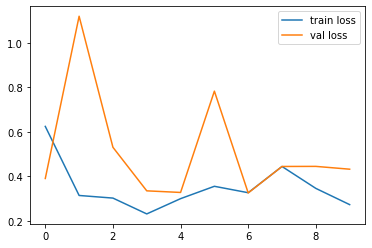

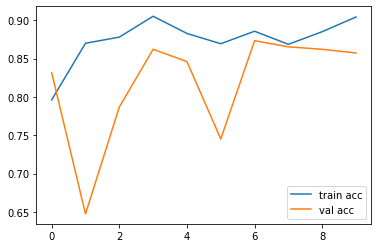

In [43]:
plt.plot(resnet.history['loss'], label='train loss')
plt.plot(resnet.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(resnet.history['accuracy'], label='train acc')
plt.plot(resnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [44]:
y_pred_res = modelresnet.predict(test_set)

In [46]:
y_pred_res = np.argmax(y_pred_res, axis=1)
y_pred_res

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,

In [48]:
img_datares=rpp(imgx)
rest = modelresnet.predict(img_datares)

In [49]:
rest

array([[2.0596715e-04, 9.9979407e-01]], dtype=float32)

In [ ]:
modelresnet.predict(img_data)

In [ ]:
modelresnet.predict(img_datanor)

In [35]:
from keras.models import load_model

model.save('model_vgg19new.h5')

In [45]:
modelresnet.save('model_resnetnew.h5')

In [51]:
val_set = test_datagen.flow_from_directory('/Users/akshayadlakha/Downloads/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 16 images belonging to 2 classes.


In [52]:
y_pred_res_val = modelresnet.predict(val_set)

In [53]:
y_pred_res_val

array([[3.3239091e-03, 9.9667609e-01],
       [1.6593333e-02, 9.8340660e-01],
       [9.9718261e-01, 2.8174503e-03],
       [2.4073827e-03, 9.9759263e-01],
       [2.2454434e-03, 9.9775451e-01],
       [9.9469107e-01, 5.3089131e-03],
       [2.3214679e-04, 9.9976784e-01],
       [6.6515863e-01, 3.3484134e-01],
       [1.8950750e-01, 8.1049252e-01],
       [3.5772298e-02, 9.6422768e-01],
       [9.6326210e-02, 9.0367383e-01],
       [8.0923137e-04, 9.9919075e-01],
       [6.2062754e-03, 9.9379373e-01],
       [6.6336192e-02, 9.3366379e-01],
       [2.6116329e-01, 7.3883665e-01],
       [2.0793221e-05, 9.9997926e-01]], dtype=float32)